# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [1106]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [1066]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=(1,), precision=30):
    ''' Генерирует U[0,1] с точностью precision.
        size - задаёт размерность выборки и может быть tuple или int
    '''
    if isinstance(size, int):
        size = (size,) # позволяет вызывать двумя способами
    degs = np.arange(-1, -(precision + 1), -1) # степени разрядов после запятой
    degs = 2. ** degs # вес единицы в разрядах
    degs = np.tile(degs, size + (1,)) # склонируем до нужной размерности
    value = degs * coin(size + (precision,)) # перемножая веса разрядов на 0 или 1 из coin
    return value.sum(axis = len(size)) # и суммируя, получим требуемое

X = uniform(size=(2,3,5), precision=30)
print(X.shape)
print(X) # демонстрация

(2, 3, 5)
[[[ 0.96505762  0.74293248  0.57784445  0.77405054  0.54486022]
  [ 0.46271051  0.11289862  0.90187289  0.50366131  0.23976087]
  [ 0.27976369  0.8673622   0.74137563  0.23554076  0.09837981]]

 [[ 0.42804889  0.34659174  0.23224678  0.19186691  0.29837723]
  [ 0.8973229   0.61526289  0.85326591  0.04978015  0.52881669]
  [ 0.92057389  0.06410113  0.34672076  0.02197847  0.06687216]]]


Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

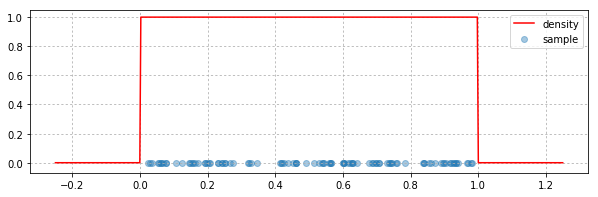

In [1067]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)

plt.figure(figsize=(10, 3))
plt.scatter(uniform(size, precision=50), # <Сгенерируйте выборку размера size точности 50>
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.uniform.pdf(grid), # <Посчитайте плотность в точках grid, используя sps.uniform.pdf>
         color='red', label='density') 
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

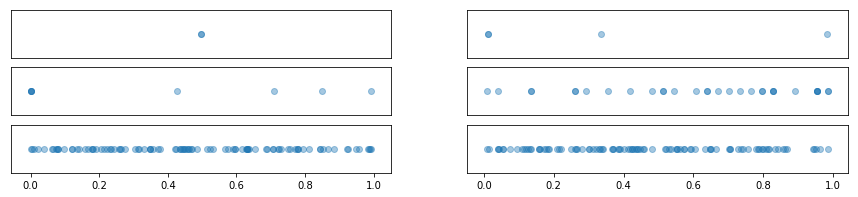

In [1068]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform(min(2**precision, size), precision), # <Сгенерируйте выборку размера size точности precision>
                np.zeros(min(2**precision, size)), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

При малых precision(вообще - при всех конечных, но мы говорим, что это приближение к распределению на отрезке)  получаем некоторое дискретное равномерное распределение. (это можно наблюдать при $size := min(2^{precision}, size)$)

При увеличении precision выборка стремится к выборке из U([0, 1]).

В итоге, мы можем генерировать выборку из равномерного распределения с помощью Bern(1/2), которая при высокой precision выглядит очень правдоподобно.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги <b>(какой?)</b> по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [1069]:
def normal(size=1, loc=0, scale=1, precision=30):
    ''' Генерирует Norm(loc, scale^2) из U([0,1]) с точностью precision
        с помощью преобразования Бокса-Мюллера
        size - задаёт размерность выборки и может быть tuple или int
    '''
    e = uniform(size=size, precision=precision)
    n = uniform(size=size, precision=precision)

    # X = cos(2πξ) sqrt(−2 ln η), (η,ξ ~ U((0,1]) - Box–Muller transformation
    z = np.cos(2. * np.pi * e) * np.sqrt(-2. * np.log(n)) # ~ Norm(0, 1)
    return loc + scale * z
    
    
X = normal(size=(2, 3, 5)) # демонстрация
print(X.shape)
print(X)

(2, 3, 5)
[[[ 1.11844317  1.53736252  1.41015723  0.42874617 -0.29661177]
  [-0.03810659  0.3786692  -1.38618781  0.99310722 -1.15315037]
  [-0.96028611  0.0457302  -0.69940074  0.80660808 -1.03972202]]

 [[-0.26621495  1.15264833 -0.70321675  0.03209842 -1.10618718]
  [ 0.04187473 -0.36614136 -0.84376819  0.19904959 -1.89290584]
  [-0.54428401 -1.71609926  0.99756034 -0.37582856 -0.08983569]]]


Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

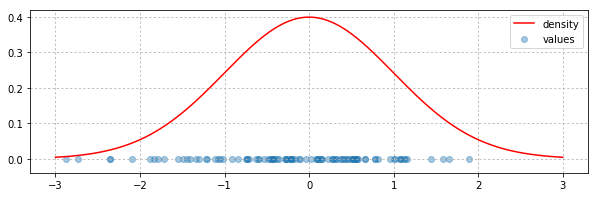

In [1070]:
loc, scale = (0., 1.) # for checking (I haven't seen block below when wrote this)

size = 100
grid = np.linspace(loc - 3. * scale, loc + 3. * scale, 500) # equals [-3, 3] when loc = 0., scale = 1.

plt.figure(figsize=(10, 3))
plt.scatter(normal(size, precision=50, loc=loc, scale=scale), # <Сгенерируйте выборку размера size точности 50>
            np.zeros(size), alpha=0.4, label='values')
plt.plot(grid, sps.norm.pdf(grid, loc=loc, scale=scale), # <Посчитайте плотность в точках grid, используя sps.uniform.pdf>,
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

$F_{a,\sigma}(x) = \int\limits_{-\inf}^{x} p_{a,\sigma}(x) dx = F_{a,\sigma}((x - a) / \sigma) = \int\limits_{-\inf}^{(x - a) / \sigma} p(x) dx$
$\Rightarrow \int\limits_{-\inf}^{x} p_{a,\sigma}(x) dx = \int\limits_{-\inf}^{x} \frac{1}{\sigma} p((x - a) / \sigma) dx $
$\Rightarrow p_{a,\sigma}(x) = \frac{1}{\sigma} p((x - a) / \sigma)$

$\forall x$ везде. Последний переход верен при оговорке, что обе функции - плотноть одного и того же распределения. (например, можно изменить значение плотности в одной точке, но распределение при этом не изменится)

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

$p_{\mathcal{N}(a, \sigma^2)} = \frac{1}{\sigma\sqrt{2\pi}}\; e^{-\frac{\left(x-a\right)^2}{2\sigma^2} }$
$p(x) = p_{\mathcal{N}(0, 1)} = \frac{1}{\sqrt{2\pi}}\; e^{-\frac{\left(x\right)^2}{2} }$
$p_{a,\sigma}(x) = \frac{1}{\sigma} p((x - a) / \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\; e^{-\frac{\left(x-a\right)^2}{2\sigma^2} }$

$\Rightarrow p_{\mathcal{N}(a, \sigma^2)} = p_{a,\sigma}(x)$ т.е. это семейство - все нормальные распределения. Из его свойств мы знаем, что $E[\xi] = a, D[\xi] = \sigma^2$

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интервал по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

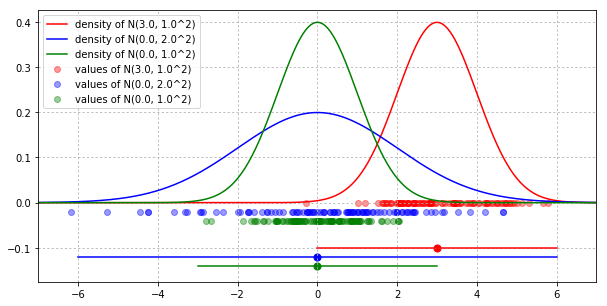

In [1071]:
plt.figure(figsize=(10, 5))

def plotNorm(a=0., sigma=1., scatterY=0., intervalY=-0.1, color="red"):
    size = 100
    grid = np.linspace(-7., 7., 500) # X limit and segment
    name = 'N(' + str(a) + ", " + str(sigma) + "^2)";
    plt.scatter(normal(size, precision=50, loc=a, scale=sigma),
                np.ones(size) * scatterY, alpha=0.4, label=("values of " + name), color=color)
    plt.plot(grid, sps.norm.pdf(grid, loc=a, scale=sigma),
                 color=color, label=("density of " + name))
    
    plt.plot([a - 3 * sigma, a + 3 * sigma], [intervalY, intervalY], color=color)
    plt.scatter(a, intervalY, color=color, s=50)

plotNorm(3., 1.,)
plotNorm(0., 2., scatterY = -0.02, intervalY=-0.12, color="blue")
plotNorm(0., 1., scatterY = -0.04, intervalY=-0.14, color="green")

plt.xlim((-7, + 7)) # X limit and segment
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Мы умеем генерировать выборку ~$\mathcal{N}(loc, scale^2)$ из U([0,1]) с помощью преобразования Бокса-Мюллера на практике, при этом с помощью графиков ещё раз убедились, что loc - матожидание $\mathcal{N}$, (дисперсия - $scale^2$, но этот результат не очевиден из графика), и что с высокой вероятностью значения случайных величин из $\mathcal{N}$ содержатся в интервале $[loc - 3 scale, loc + 3 scale]$ (~0.997 - $\pm 3 scale$, ~0.95 - $\pm 2 scale$, ~0.68 - $\pm 1 scale$, что важно, например для учёта погрешностей в физических экспериментах). Кроме того, мы ещё раз продемонстрировали "геометрическую" трактовку параметров нармального распределения в смысле параметров сдвига и масштаба из вопросов выше.

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [1072]:
from scipy.linalg import eigh # ONLY FOR a complex Hermitian or real symmetric matrix. Otherwise, use eig

a = np.array([[0., 0., 0.], [0., 1., 2.], [0., 2., 3.]])

def ortogonalDecomposition(a):
    ''' Раскладывает матрицу в ортогональную декомпозицию
        a = Rt * D * R, где Rt.T = R, D - диагональна.
        Работает и для вырожденных
    '''
    l, u = eigh(a)
    L = np.diag(l);
    return u, L, u.T # Rt, D, R in terms from lection

Rt, D, R = ortogonalDecomposition(a) # demonstration
print(Rt, D, R)
print(Rt @ D @ R)

[[ 0.          1.          0.        ]
 [ 0.85065081  0.          0.52573111]
 [-0.52573111  0.          0.85065081]] [[-0.23606798  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          4.23606798]] [[ 0.          0.85065081 -0.52573111]
 [ 1.          0.          0.        ]
 [ 0.          0.52573111  0.85065081]]
[[ 0.  0.  0.]
 [ 0.  1.  2.]
 [ 0.  2.  3.]]


На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

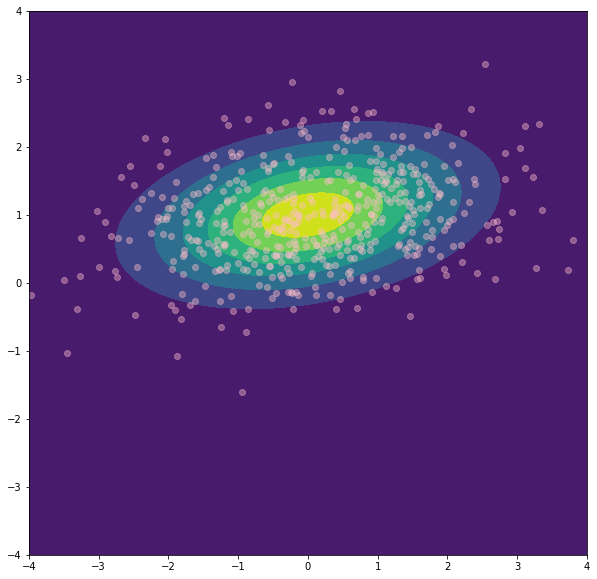

In [1073]:
def gauss(mean, cov_matrix, size=1, precision=30):
    ''' Генерирует выборку из многомерного нормального распределения
        с заданным вектором средних mean и матрицей ковариаций cov_matrix.
        Использует теорему об эквивалентных определениях гауссовского вектора.э
        precision используется для генерации нормального, см. normal
    '''
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    Rt, D, R = ortogonalDecomposition(cov_matrix)
    A = Rt @ np.sqrt(D) # we use theorem from 3rd semester
    return (A @ normal(size=(mean.size, size),
                       precision=precision)).T + np.tile(mean, (size, 1))
        # we don't use cycles!


# Nice nonsymmetrical plot
size = 500
plt.figure(figsize=(10, 10))
plt.xlim((-4, 4))
plt.ylim((-4, 4))
mean, cov = [0,1], [[2.0, 0.3], [0.3, 0.5]]

x, y = np.mgrid[-4:4.01:0.05, -4:4.01:0.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
plt.contourf(x, y, sps.multivariate_normal(mean, cov).pdf(pos))

sample = gauss(mean=mean, cov_matrix=cov, size=size)  # Генерация выборки
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, color="Pink")
plt.show() # sample for another mean and cov

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

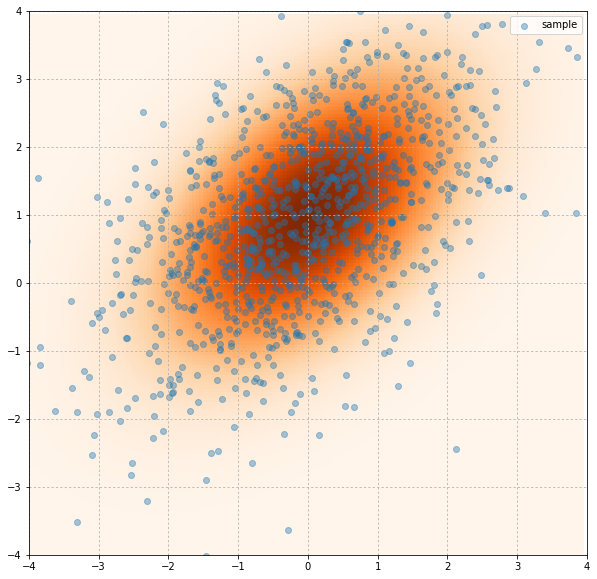

In [1074]:
size = 1000
mean, cov = [0., 1.], [[2., 1.], [1., 2.]]
sample = gauss(mean=mean, cov_matrix=cov, size=size)  # Генерация выборки

grid = np.mgrid[-4:4:0.05, -4:4:0.05]

x, y = grid
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x # Здесь нет циклов!
pos[:, :, 1] = y

# Вычисление плотности 
density = np.array(sps.multivariate_normal(mean, cov).pdf(pos))

plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

Из распределения $Bern(1/2)$ мы научились строить $U([0,1]), \mathcal{N}(loc, scale^2)$, в том числе для многомерного нормального распределения, для которого верны аналогичные вышесказанным утверждения о зависимости матожидания и "разброса значений" от параметров раcпределения.

Представляя с помощью теоремы генерируемое значение в виде $x = R^T  \sqrt{D} \mathcal{N} + \mu = R^T \mathcal{N}(0,D) + \mu$ получим, что распределение $\mathcal{N}(\mu, \Sigma)$ суть есть $\mathcal{N}(0, E)$, растянутая на $\sqrt{D}$, повёрнутая на $R^T$ и смещённая на $\mu$.  ($E$ - единичная матрица)

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги <b>(Какой?)</b> по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [1075]:
def expon(size=1, lambd=1, precision=30):
    ''' Генерирует выборку из экспоненциального распределения
        с заданным параметром lambda
        precision используется для генерации равномерного, см. uniform
    '''
    #-1 / lambd * U ~ Exp(lambd), where U ~ U([0, 1]) - результат задачи
    return (-1. / lambd ) * np.log(uniform(size=size, precision=precision)) 

expon(size = (7, 8, 9)).shape # работает с tuple

(7, 8, 9)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$. 

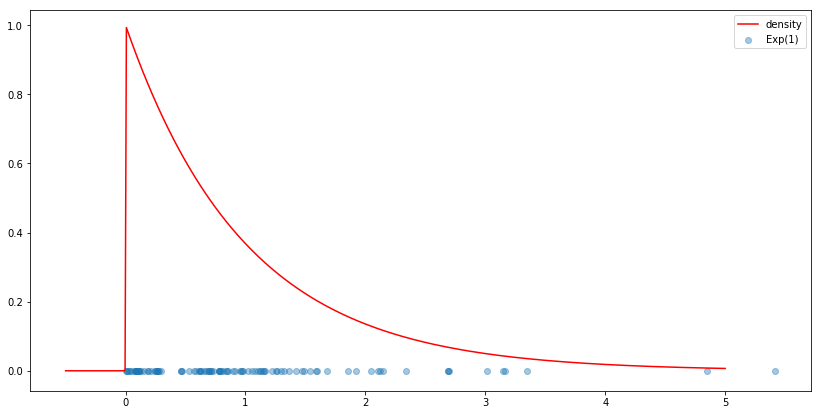

In [1076]:
plt.figure(figsize=(14, 7))
size = 100
grid = np.linspace(-0.5, 5., 500)
plt.scatter(expon(size=size, lambd=1), np.zeros(size),
            alpha=0.4, label="Exp(1)")
plt.plot(grid, sps.expon.pdf(x=grid, scale=1.),
         label="density", color="red")
plt.legend()
plt.show()

# A common parameterization for expon is in terms of the rate parameter lambda,
# such that pdf = lambda * exp(-lambda * x).
# This parameterization corresponds to using scale = 1 / lambda.
# (docs.scipy.org)


**Вывод:**

Мы научились генерировать выборки похожие на $Exp(\lambda)$  (приближение к ним), используя только $Bern(1/2)$
Используя результат этой задачи, мы можем генерировать случайные величины со строго возрастающими функциями распределения с помощью генератора равномерно распределённых величин. Результат этой задачи также называется методом обратного преобразования или преобразованием Н.В. Смирнова.

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [1077]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

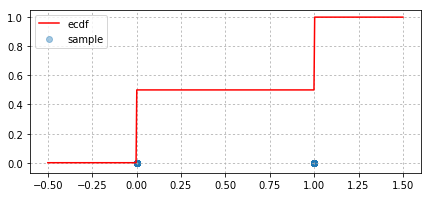

In [1078]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [1079]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        plt.scatter(sample[:size], np.zeros(size), # <Первые size точек из sample с нулевой y-координатой>
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, cdf(x=grid),
                     # <Значения функции распределения в точках grid>
                     color='green', alpha=0.3, lw=2, label='true cdf')
        
        ecdf = ECDF(sample[:size])
        plt.plot(grid, ecdf(grid),
                 # <Значения эмпирической функции распределения 
                 # (по первым size точек из sample) в точках grid>
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[:size], # <Постройте гистограмму по первым size точек из sample>
                 bins=20, # <Установите 20 ячеек>
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, pdf(x=grid),
                     # <Значения плотности в точках grid>
                     color='green', alpha=0.3, lw=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
        
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(sample[:size], np.zeros(size), # <Первые size точек из sample с нулевой y-координатой>
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid, pdf(x=grid),
                     #<Значения плотности в точках grid>
                     color='green', alpha=0.3, lw=2, label='true pdf')

        dens = KDEUnivariate(sample[:size])
        dens.fit()
        plt.plot(grid, dens.evaluate(grid),
                 # <Значение ядерной оценки плотности (по первым size точек из sample) 
                 # в точках grid (используйте evaluate)>
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()

При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py` замените строку 20 на
<h4> Этот патч сломал мой Python (3.5.2), без него - работает из коробки: </h4>
`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j` 

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и 
$Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

U[0,1]


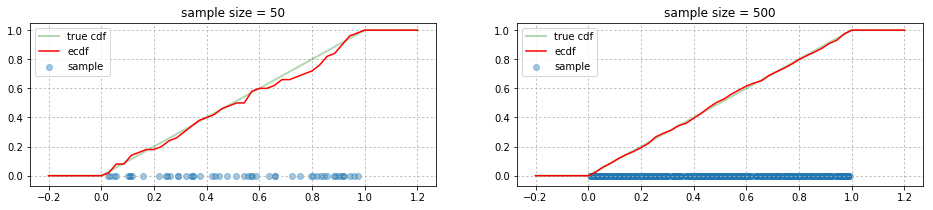

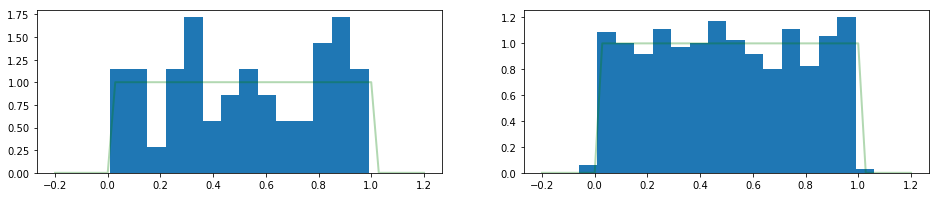

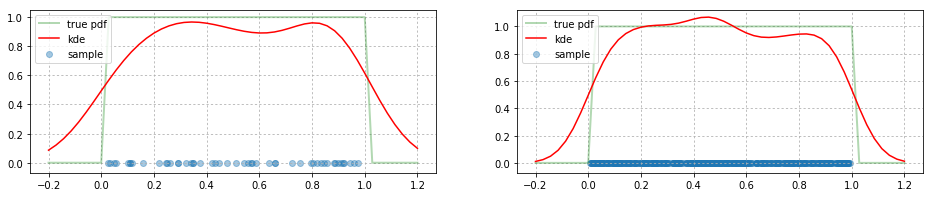

N(0,1)


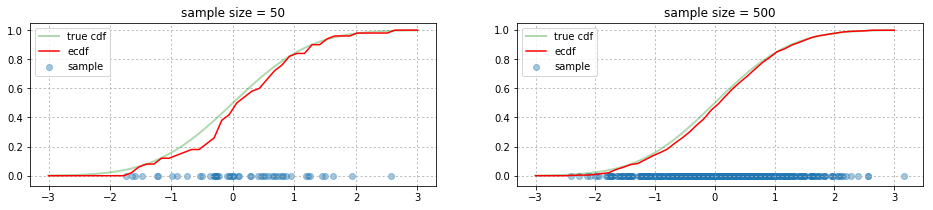

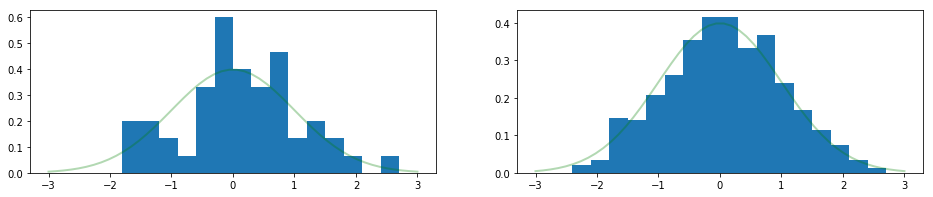

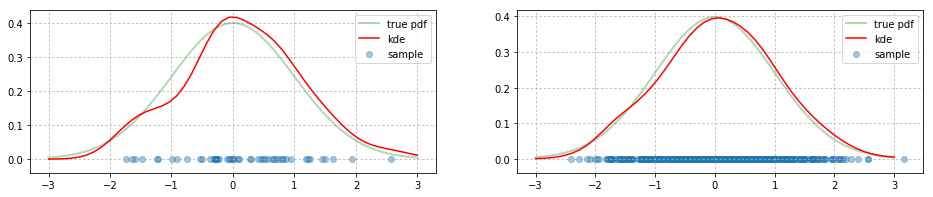

Exp(1)


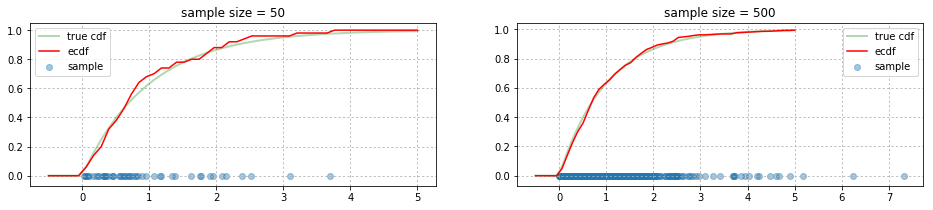

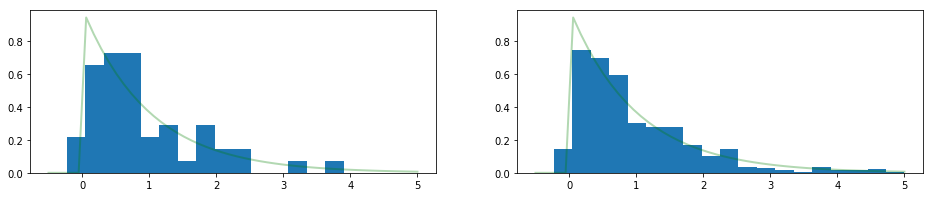

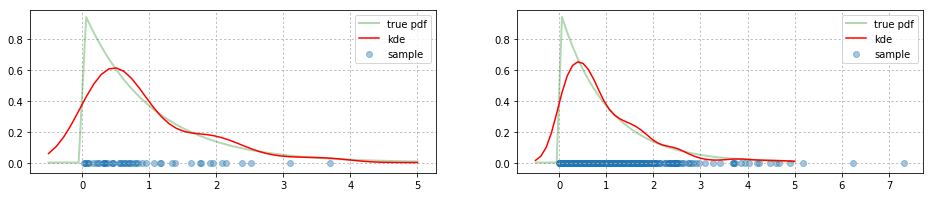

In [1080]:
size = 500
args = [ # so lazy to copy-paste
    (np.linspace(-0.2, 1.2), uniform, sps.uniform, "U[0,1]"),
    (np.linspace(-3., 3.), normal, sps.norm, "N(0,1)"),
    (np.linspace(-0.5, 5.), expon, sps.expon, "Exp(1)")
]

for grid, distr, spsDistr, name in args:
    print(name) # перебираем распределение и проч., для каждого строим графики
    sample = distr(size = size)
    draw_ecdf(sample, grid, spsDistr.cdf)
    draw_hist(sample, grid, spsDistr.pdf)
    draw_pdf(sample, grid, spsDistr.pdf)


**Вывод:**

Эмпирическая функция распределения даёт хорошее приближение функций распределения, рассмотренных выше. При увеличении размера выборки качество прогноза увеличивается.

Ядерная оценка плотности даёт хорошо оценивает достаточно гладкие участки реального распределения, однако, при малом размере выборки её применение даёт сомнительный результат, влияние отдельных значений существенно. Например, график плотности экспоненциального распределения похож на плотность нормального или гамма распределения. Изменение ширины исправляет оценку в точках разрыва U([0,1]), но портит во всех остальных. 

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

In [1084]:
size = 10000
X = normal(size=size)
F = [ECDF(X[:prefix]) for prefix in range(1, size + 1)] # Fn-нные
len(F)

10000

Для посчёта точного значения воспользуемся тем, что $F_n^*$ кусочно-постоянна, а F - непрерывно-монотонна. 
Это означает, что супремум достигается в точках разрыва(нужно проверить значение с обоих сторон точки) или в $\pm\inf$

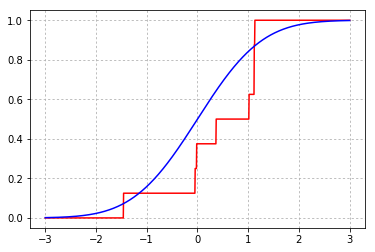

In [1085]:
grid = np.linspace(-3, +3, 1000)
plt.plot(grid, F[7](grid), color="red", label="F*n(7)")
plt.plot(grid, sps.norm.cdf(x=grid), color="blue", label="F")
plt.grid(ls=':')
plt.show()

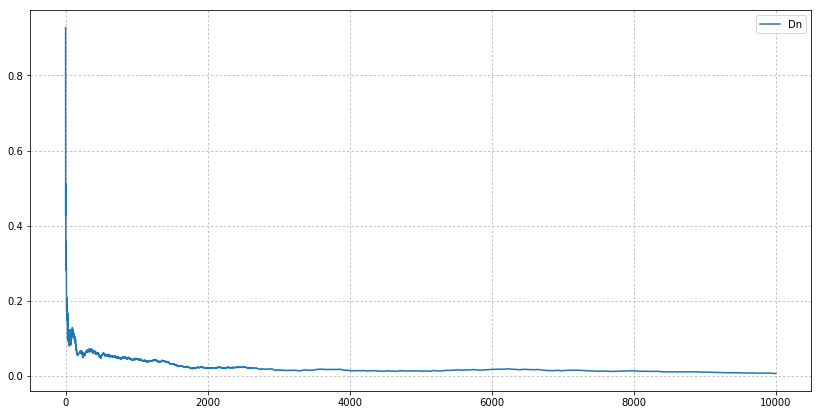

In [1086]:
Xn = X[:]
Xn = np.sort(Xn)
minimum = Xn[0]
maximum = Xn[-1]
Xl = np.concatenate((np.array([minimum - 1.]), Xn))
Xr = np.concatenate((Xn, np.array([maximum + 1.])))

# так мы без циклов вычислили минимальное расстояние между соседними точками
minDistance = (Xr - Xl).min()
radius = minDistance / 2.


# value in F*(x - 0) equals F*(x - radius),
# because F* is constant in (-minDistance, + minDistance)

D = [max( # max( sup <F* - F>(x - 0), sup <F* - F> (x + ) )
            (np.abs(F[i](X - minDistance) - sps.norm.cdf(X))).max(), 
            (np.abs(F[i](X + minDistance) - sps.norm.cdf(X))).max()  
        ) for i in range(size)] # we also have checked +-inf

plt.figure(figsize=(14, 7))
plt.plot(range(1, size + 1), D, label = "Dn")
plt.legend()
plt.grid(ls=":")
plt.show()


**Вывод:**

Имеем демонстрацию на практике теоремы Гливенко-Кантелли, утверждающей, что $D_n \rightarrow 0$ в смысле почти наверное.
Уместно упомянуть теорему Колмогорова-Смирнова, утверждающую, что $\sqrt(n)D_n \rightarrow K$ по распределению, где К имеет распределение Колмогорова.

На практике это означет, что эмпирическая функция распределения при достаточно большой выборке даёт достаточно точный результат.

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

In [1087]:
X = uniform(200)
grid = np.linspace(-0.2, 1.2, 1000)

"""
http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.fit.html

    “biw” for biweight
    “cos” for cosine
    “epa” for Epanechnikov
    “gau” for Gaussian.
    “tri” for triangular
    “triw” for triweight
    “uni” for uniform
"""

kernels = { 
    "biw":"biweight", "cos":"cosine", "epa":"Epanechnikov",
    "gau":"Gaussian", "tri":"triangular", "triw":"triweight", "uni":"uniform"}

widths = 1. / np.geomspace(1, 1000, 30) # linspace is so boooring for this...

#http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.fit.html
namedWidths = ["scott", "silverman", "normal_reference" ]



Различная ширина, гауссовское ядро

some widths ... 


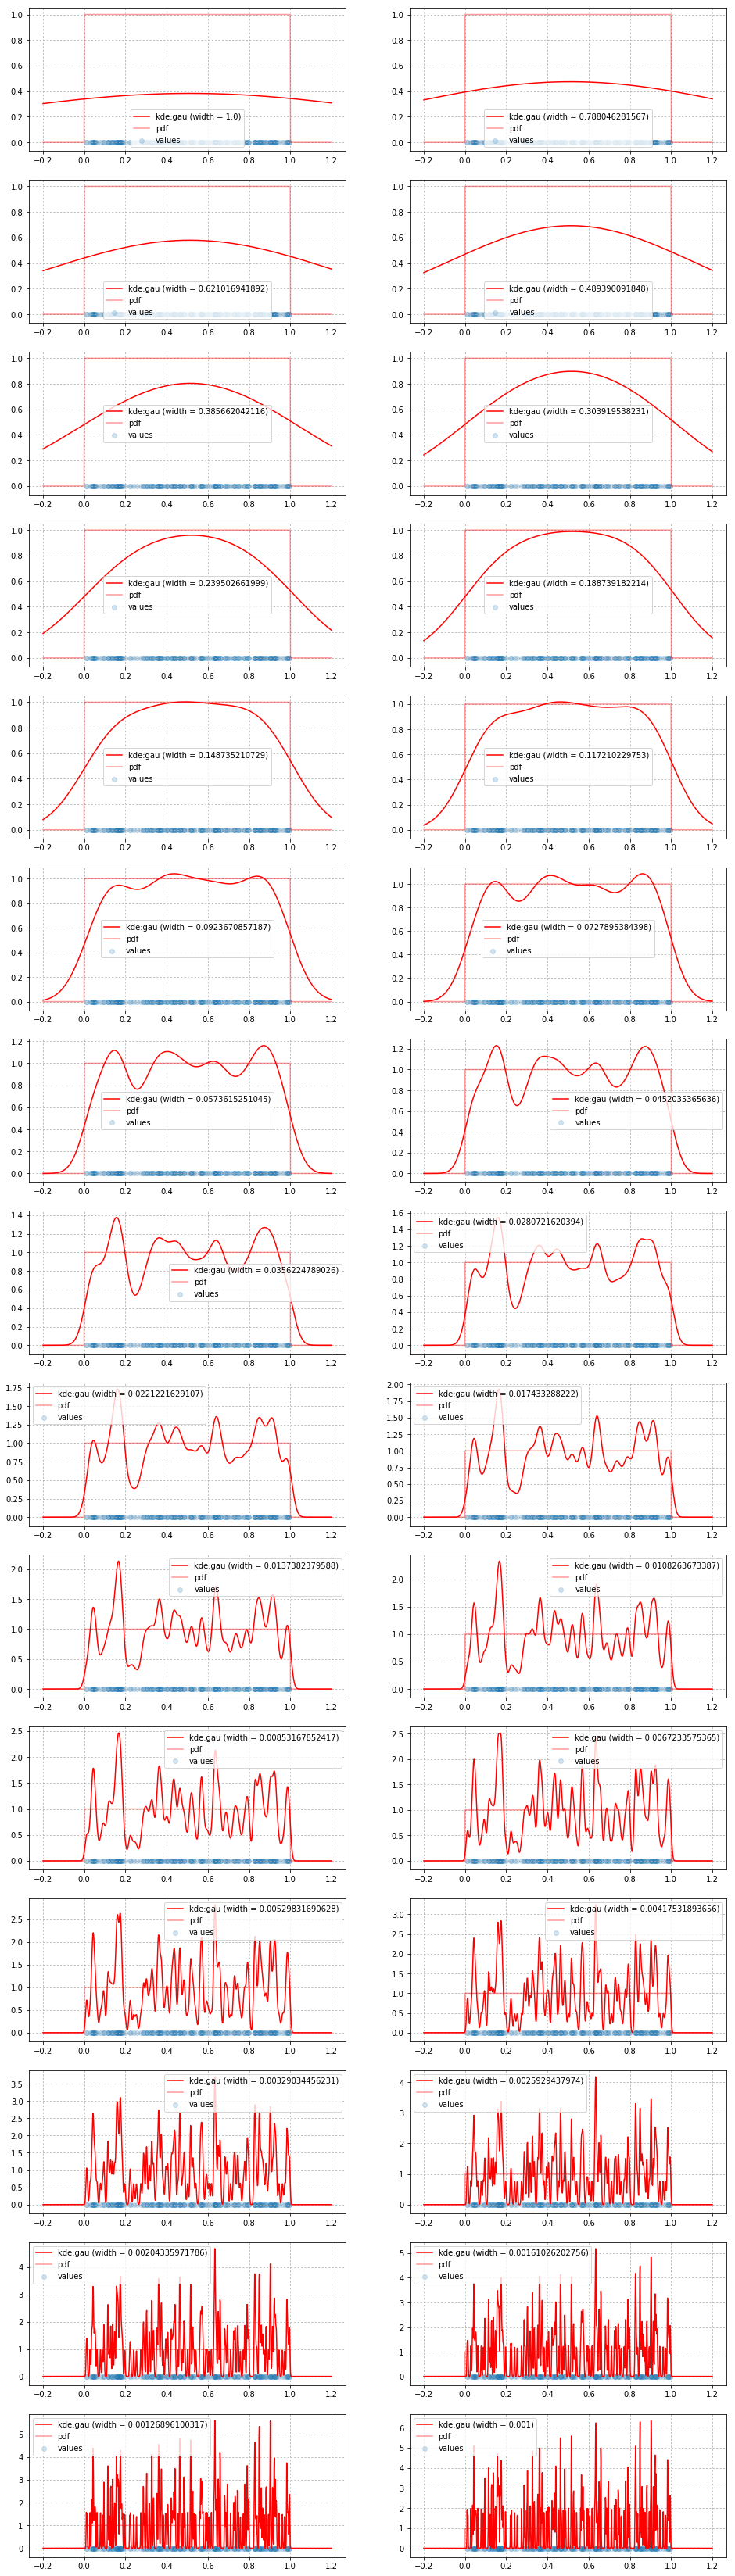

there is some named widths, they uses std (standart deviation?) and IQR as a parameter


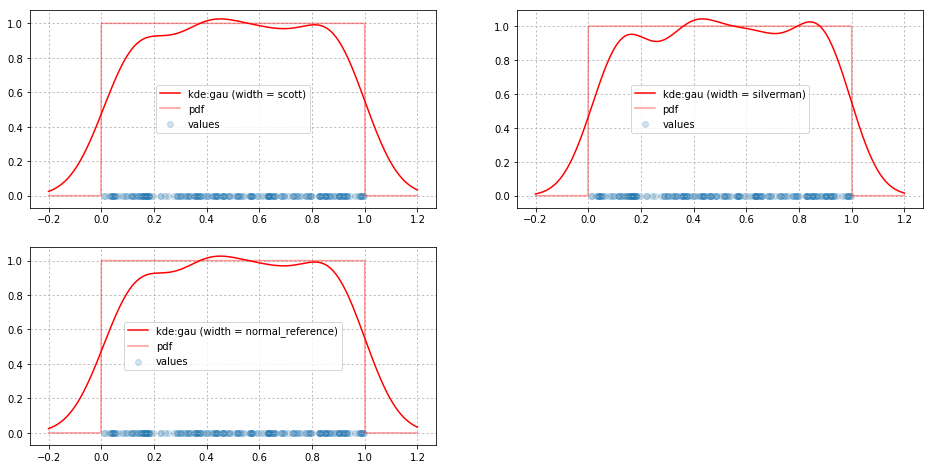

In [1088]:
def widthsPlot(widths):
    shape = (int(len(widths) / 2. + 0.5), 2)
    plt.figure(figsize=(16, shape[0] * 4))
    for i, width in enumerate(widths):
        plt.subplot(shape[0], shape[1], i + 1)
        dens = KDEUnivariate(X)
        dens.fit(kernel="gau", bw=width) 
        denVals = [dens.evaluate(dot) for dot in grid] # dens.evaluate(grid) doesn't work for other kernels
        plt.plot(grid, denVals, color="red",
                 label="kde:gau (width = " + str(width) + ")" )
        plt.plot(grid, sps.uniform.pdf(grid),
                 color="red", alpha=0.4, label="pdf")
        plt.scatter(X, np.zeros(X.size), alpha=0.2, label="values")
        plt.grid(ls=":")
        plt.legend()
    plt.show()
    
print("some widths ... ")
widthsPlot(widths)

print("there is some named widths, they uses std (standart deviation?) and IQR as a parameter")
widthsPlot(namedWidths)

Фиксированная ширина, различные ядра

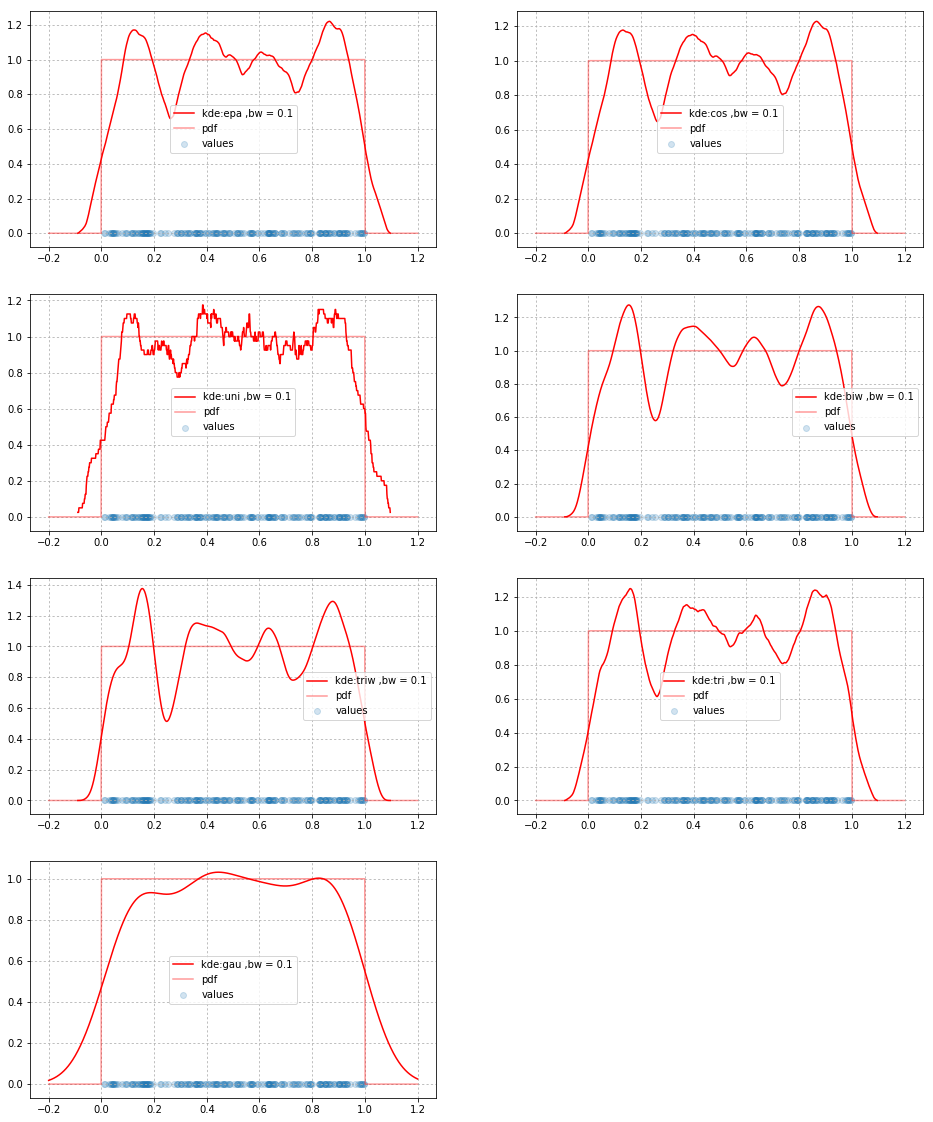

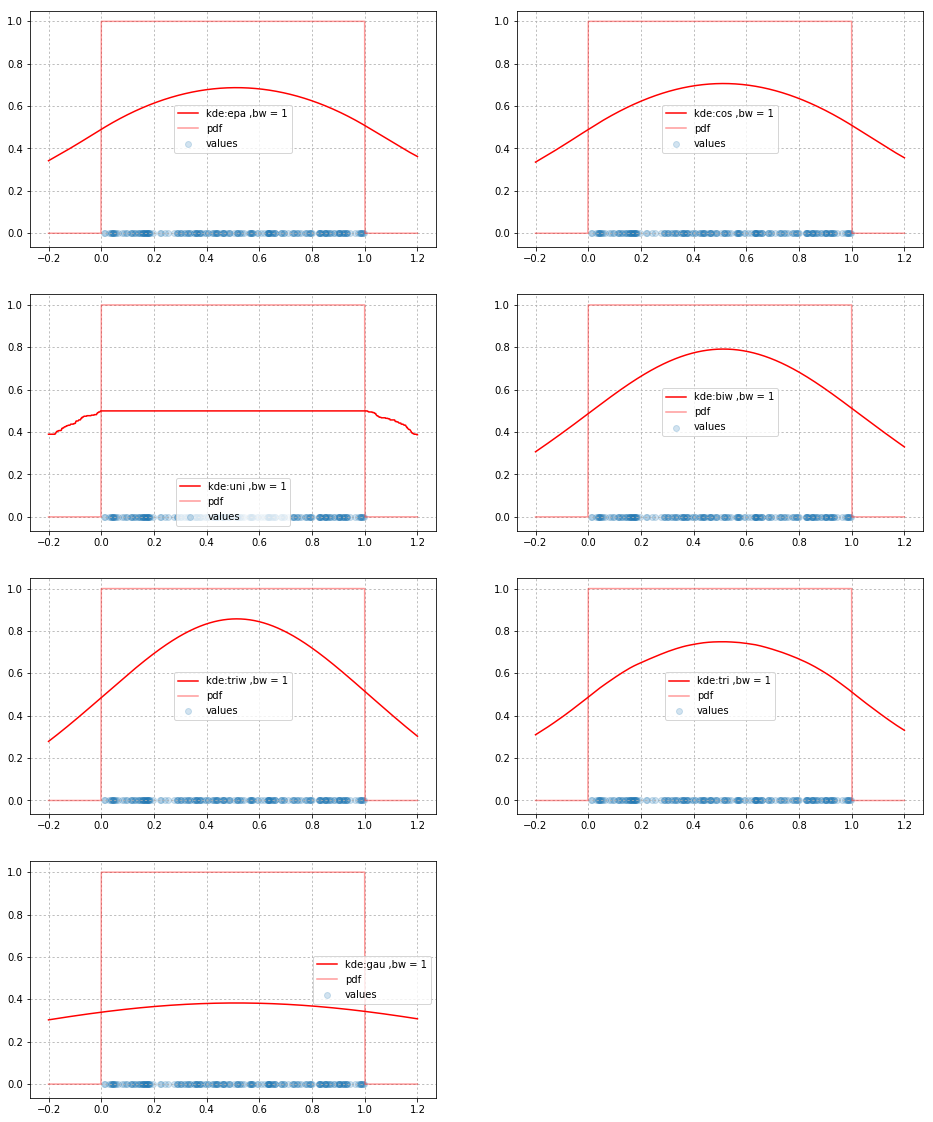

In [1089]:
shape = (int(len(kernels) / 2. + 0.5), 2)
for bw in (0.1, 1):
    plt.figure(figsize=(16, 20))
    for i, kernel in enumerate(kernels):
        plt.subplot(shape[0], shape[1], i + 1)
        dens = KDEUnivariate(X)
        dens.fit(kernel=kernel, fft=False,  bw=bw) # fft works only with "gau" kernel
        denVals = [dens.evaluate(dot) for dot in grid] # we can't use dens.evaluate(grid) when kernel != "gau" 
        plt.plot(grid, denVals, color="red",
                 label="kde:" + kernel + " ,bw = " + str(bw))
        plt.plot(grid, sps.uniform.pdf(grid),
                 color="red", alpha=0.4, label="pdf")
        plt.scatter(X, np.zeros(X.size),
                    alpha=0.2, label="values")
        plt.grid(ls=":")
        plt.legend()
    plt.show()

**Вывод:**

Ширина задаёт в некотором смысле "обобщающую способность" - чем больше ширина, тем меньше оценка реагирует на отдельные значения и больше - на общее положение. При это излишне большая ширина обощает значения так, что не оставляет какой-либо информации.

При это, при больших выборках различные ядра дают схожие результаты, при этом более гладкие ядра обобщают более гладко, и проч., из чего можно сделать вывод, что для приближения неизвестного распределения нужно брать ядро той же природы: равномерное хорошо приближается равномерным, нормальное - нормальным ("gau" - гауссово ядро). Это видно на графиках в этой задаче и в задаче 3 (там было нормальное). Т.е., например, величины с кусочно-постоянной плотностью логичнее приближать равномерным("uni" - прямоугольным на леции) ядром, а не нормальным.

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график <b>(зависимости чего от чего?)</b> и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

In [1090]:
file = "countries.csv" # Sabaton – The Art of War 
import pandas as pd

data = pd.read_csv(file, sep="\t", header=None, index_col=0) # this isn't Comma-Separated File
print(data.head().values) 
onlyAreas = data.values[:, 1]
print(onlyAreas.size)
onlyAreas = np.array(onlyAreas, dtype=float) #

[['Russia' 17125191.0]
 ['Canada' 9984670.0]
 ['China' 9596961.0]
 ['United States' 9525067.0]
 ['Brazil' 8515767.0]]
258


In [1091]:
x1 = onlyAreas.mean() # оценка по методу моментов, с учётом особой параметризации scale = 1/lambda в sps.expon
ecdf = ECDF(onlyAreas) 
grid = np.linspace(onlyAreas.min() - 1.,
                   onlyAreas.max() + 1., 10000)
density = KDEUnivariate(onlyAreas) # fails without "onlyAreas = np.array(onlyAreas, dtype=float)"
density.fit()

Without 10 (3.875969 %) biggest countries


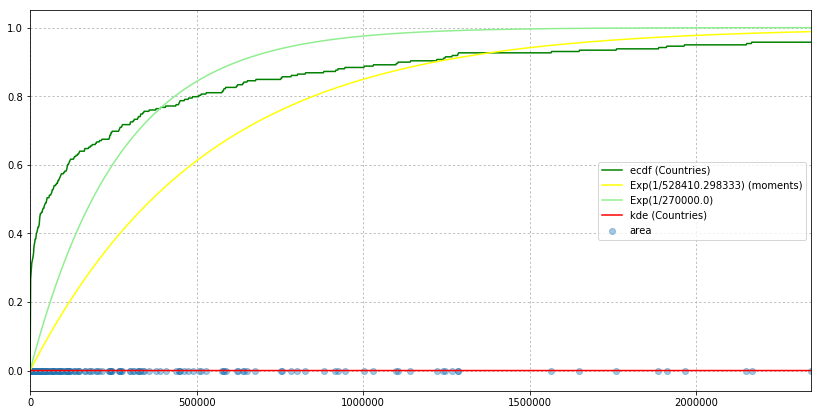

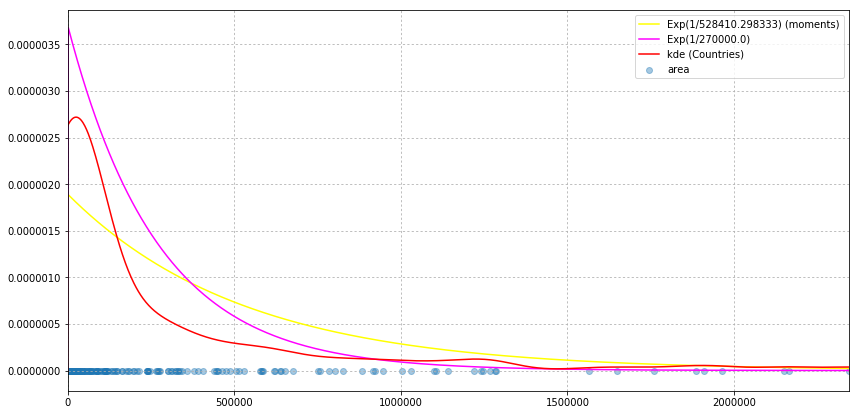

All countries


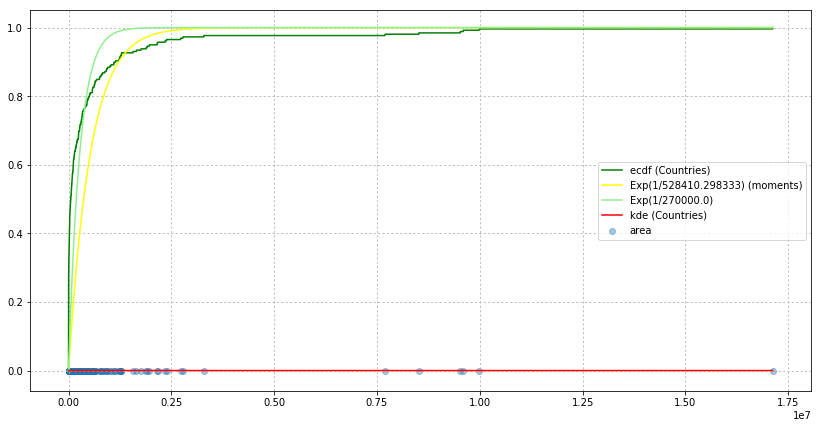

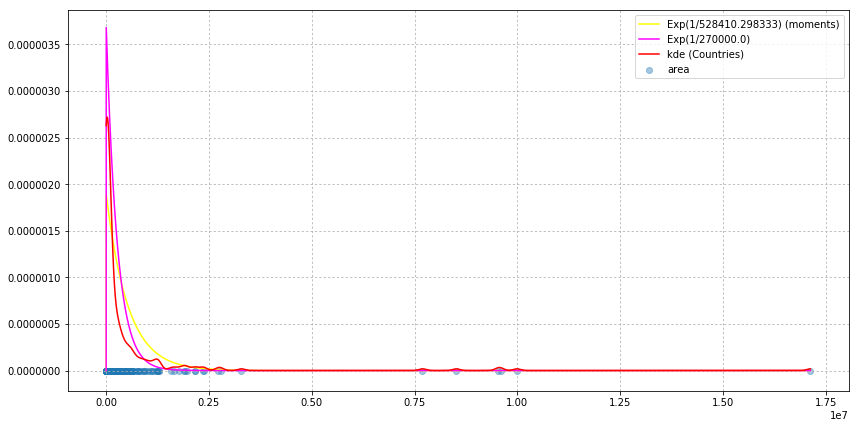

In [1092]:
def plotData(grid, ecdf, density, xlim = None):
    #a = 20000.
    #sigma = 150000
    scale = 270000.;
    plt.figure(figsize = (14, 7))
    plt.plot(grid, ecdf(grid), label="ecdf (Countries)", color="green")
    #plt.plot(grid, sps.norm.cdf(x=grid, loc=a, scale=sigma),
    #         label="Norm(" + str(a) + "," + str(sigma) + "^2)", color="yellow")
    
    plt.plot(grid, sps.expon.cdf(grid, scale=x1),
             label="Exp(1/" + str(x1) + ") (moments)", color="yellow")
    plt.plot(grid, sps.expon.cdf(grid, scale=scale),
             label="Exp(1/" + str(scale) + ")", color="lightgreen")
    plt.plot(grid, density.evaluate(grid),
             label="kde (Countries)", color="red") #so
    plt.scatter(onlyAreas, np.zeros(onlyAreas.size),
                label="area", alpha=0.4);
    plt.legend()
    plt.grid(ls=":")
    if (xlim != None):
        plt.xlim(xlim)
    plt.show()
    
    plt.figure(figsize = (14, 7))
    #plt.plot(grid, sps.norm.pdf(x=grid, loc=a, scale=sigma),
    #         label="Norm(" + str(a) + "," + str(sigma) +  "^2)", color="yellow")

    plt.plot(grid, sps.expon.pdf(grid, scale=x1),
             label="Exp(1/" + str(x1) + ") (moments)", color="yellow")
    plt.plot(grid, sps.expon.pdf(grid, scale=scale),
             label="Exp(1/" + str(scale) + ")", color="magenta")
    plt.plot(grid, density.evaluate(grid),
             label="kde (Countries)", color="red")
    plt.scatter(onlyAreas, np.zeros(onlyAreas.size),
                label="area", alpha=0.4);
    plt.legend()
    plt.grid(ls=":")
    if (xlim != None):
        plt.xlim(xlim)
    plt.show()


print("Without 10 (%f %%) biggest countries" % (10 / len(onlyAreas) * 100))
plotData(grid, ecdf, density, xlim=(onlyAreas[-1] - 1., onlyAreas[10] + 1.))
print("All countries")
plotData(grid, ecdf, density)

**Вывод:**

При изучении графиков получаем, что распределение можно приближённо оценить как Exp, это приближение хорошо работает, если рассматривать все страны. (Якобы, время работы оборудования до отказа распределено экспоненциально - здесь можно выстроить некоторые "филосовские" аналогии)
При рассмотрении графика хочется отметить, что kde напоминает плотность нормального распределения, но это верно и для kde, построенного по выборке из экспоненциального распределения (была выше) 

Для оценки параметра exp можно применить метод моментов (жёлтые линии). Для других классов распределений (нормальное, гамма) этот метод на этих данных давал распределения, совершенно не похожие на эмпирические функции (ecdf, kde) и они здесь не приводятся.

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

**Критерий:** мы рассматриваем участников группы https://vk.com/miptru (Официальная группа МФТИ ВКонтакте)

In [1107]:
import vk
import time

session = vk.Session()
api = vk.API(session)

def getFiendsCount(users):
    res = []
    for user in users:
        try:
            res.append(len(api.friends.get(user_id=user)))
        except Exception:
            pass
    return res

In [1109]:
MiptOfficialGroupMembers = api.groups.getMembers(group_id="miptru")
print("We have reached", len(MiptOfficialGroupMembers["users"]),
      "https://vk.com/miptru members")
# https://vk.com/dev/groups.getMembers - we cannot get more than 1e3 members ...

MiptOfficialGroupMembersFriendsCount = getFiendsCount(MiptOfficialGroupMembers["users"])
print("We have reached info about",
      len(MiptOfficialGroupMembersFriendsCount), "of them")
# somebody close info or deleted...

We have reached 1000 https://vk.com/miptru members
We have reached info about 952 of them


min = 0.0 , max = 9907.0


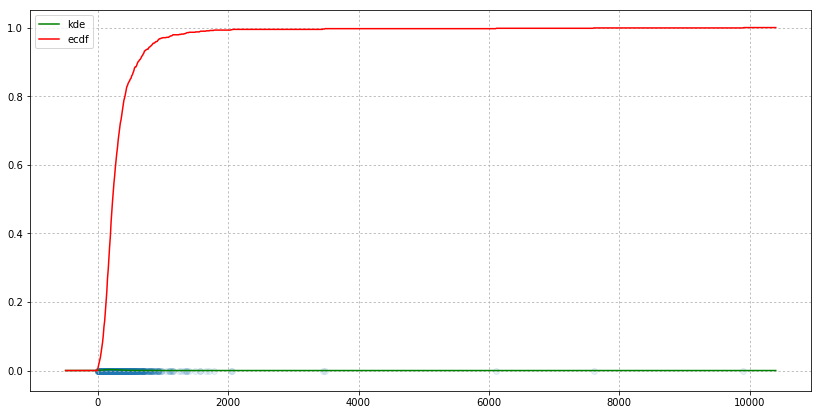

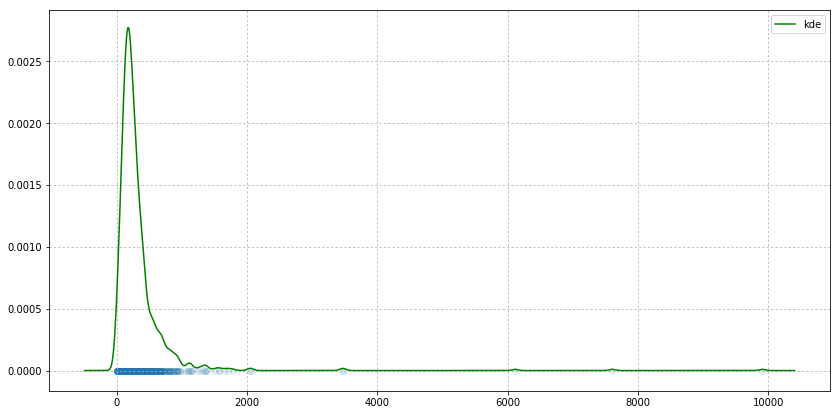

In [1110]:
X = np.array(MiptOfficialGroupMembersFriendsCount, dtype=float)

def plotPeople(X, drawNorm = None, drawGamma = None):
    print("min =", X.min(), ", max =", X.max())
    xMin = X.min()
    xMax = X.max()
    delta = (xMax - xMin) / 20. # for KDE tie
    grid = np.linspace(xMin - delta, X.max() + delta, 1000) # for 
    ecdf = ECDF(X)

    density = KDEUnivariate(X) 
    density.fit()

    plt.figure(figsize=(14, 7))
    plt.plot(grid, density.evaluate(grid), color="green", label="kde")
    plt.plot(grid, ecdf(grid), color="red", label = "ecdf")
        
    if drawGamma != None:
        plt.plot(grid, sps.gamma.cdf(grid, a=drawGamma[0],
                scale=drawGamma[1]), color="yellow",
                label = "Gamma(" + str(drawGamma[0]) +
                 "," + str(drawGamma[1]) + ") cdf")
        
    if drawNorm != None:
        plt.plot(grid, sps.norm.cdf(grid, loc=drawNorm[0],
                scale=drawNorm[1]), color="magenta",
                label = "N(" + str(drawNorm[0]) + "," +
                 str(drawNorm[1]) + ") cdf")
        
    plt.scatter(X, np.zeros(X.size), alpha=0.1)
    plt.grid(ls=":")
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 7))
    
    if drawGamma != None:
        plt.plot(grid, sps.gamma.pdf(grid, a=drawGamma[0],
                scale=drawGamma[1]), color="yellow",
                label = "Gamma(" + str(drawGamma[0]) + "," +
                 str(drawGamma[1]) + ") pdf")
        
    if drawNorm != None:
        plt.plot(grid, sps.norm.pdf(grid, loc=drawNorm[0],
                scale=drawNorm[1]), color="magenta",
                label = "N(" + str(drawNorm[0]) + "," +
                 str(drawNorm[1]) + ") pdf")
        
    plt.plot(grid, density.evaluate(grid), color="green", label="kde")
    plt.scatter(X, np.zeros(X.size), alpha=0.1)
    plt.grid(ls=":")
    plt.legend()
    plt.show()

plotPeople(X)

Некоторые люди специально накручивают число друзей в VK. Попытаемся удалить их.

In [1104]:
import heapq
XCut = X[:]
#val = heapq.nlargest(20, XCut)[-1]
val = 1000 # this is false that somebody have more than thousand of people
print("Let's remove people, who has more than", val, "friends")
willBeDeleted = (XCut >= val).sum()
print("We have deleted", willBeDeleted ,
      "(",willBeDeleted / XCut.size * 100.,"%)" )
XCut = XCut[XCut < val]

Let's remove people, who has more than 1000 friends
We have deleted 28 ( 2.94117647059 %)


Подберём подходящее значение и распределение руками
min = 0.0 , max = 991.0


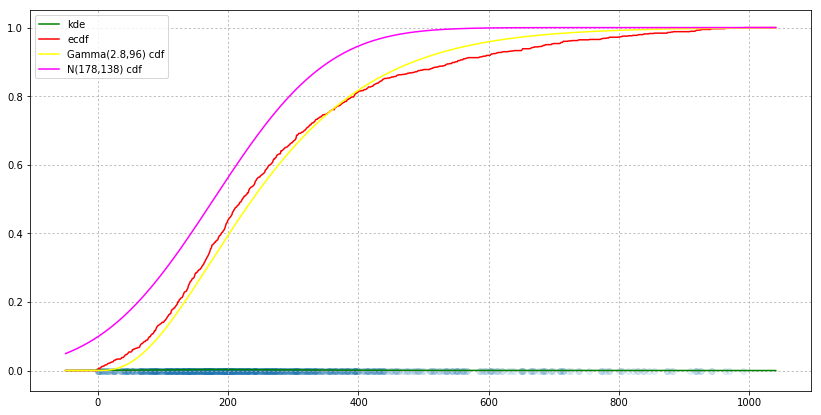

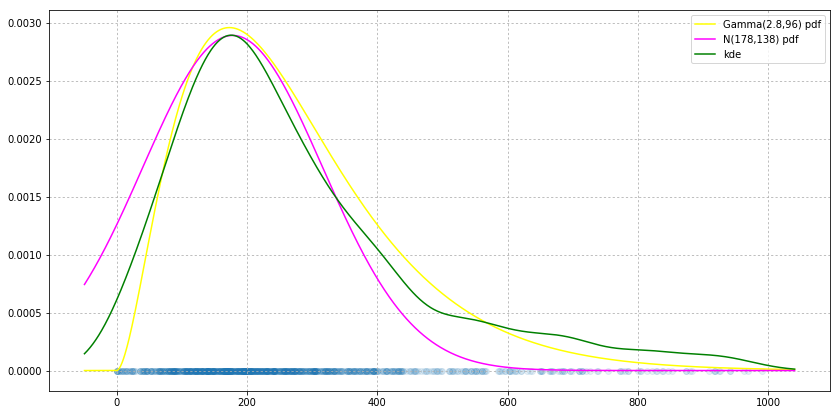

Ещё раз, но по методу моментов
min = 0.0 , max = 991.0


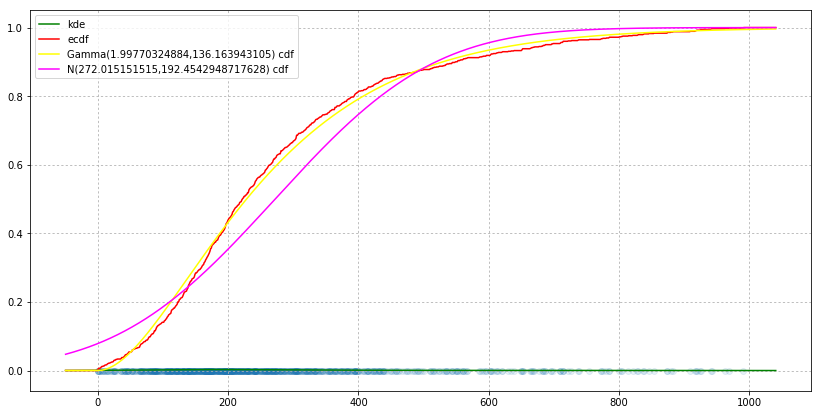

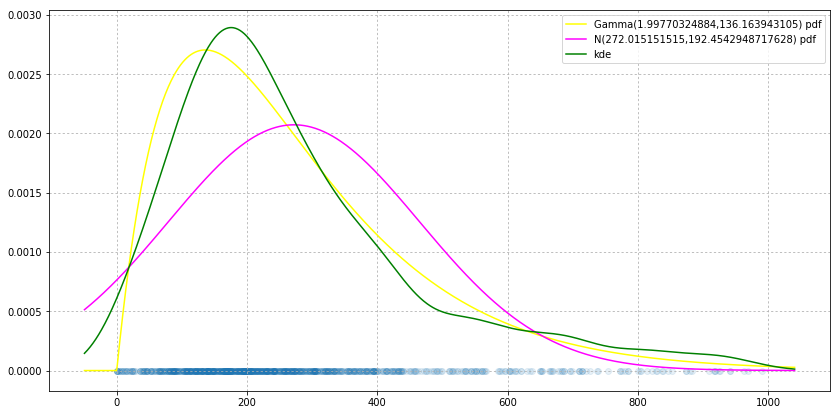

In [1105]:
import math
x1 = XCut.mean()
x2 = (XCut * XCut).mean()

def gauMoments(x1, x2): # оценки по методу моментов
    second = (x2 - x1*x1) / x1
    return (x1 / second, second)
def normMoments(x1, x2):
    return (x1, math.sqrt(x2 - x1*x1)) # аргумент scale - в sps под корнем

print("Подберём подходящее значение и распределение руками")
plotPeople(XCut, drawNorm = (178, 138), drawGamma = (2.8, 96))
print("Ещё раз, но по методу моментов")
plotPeople(XCut, drawNorm = normMoments(x1, x2),
           drawGamma = gauMoments(x1, x2))


**Вывод:**

Видим, что при удалении записей с заведомо ложным числом друзей, получаем, что, распределение хорошо приближается нормальным и гауссовым распределениями. (У нас нет конкретного метода оценки качества приближения (возможно, на момент написания этой работы)). Особенно приятны почти совпадающие графики gamma.cdf и ecdf.

Можно предположить, что нормальное распределение учитывает реальное число друзей (этому можно сопоставить рассуждение а том, что знакомство с конкретным человеком - НОРы, а их сумма по ЦПТ должна быть нормальна, впрочем, это философия), а "шум" при увеличении вызван накручиванием числа друзей в социальной сети отдельными участниками.

В дополнение можно сказать, что метод моментов также хорошо приближает функции распределения.